In [2]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import time

import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/home/vlad/miniconda3/envs/yolov8/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
for i in data.keys():
    print(f"{i} has {len(np.unique(data[i]))} unique values")

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


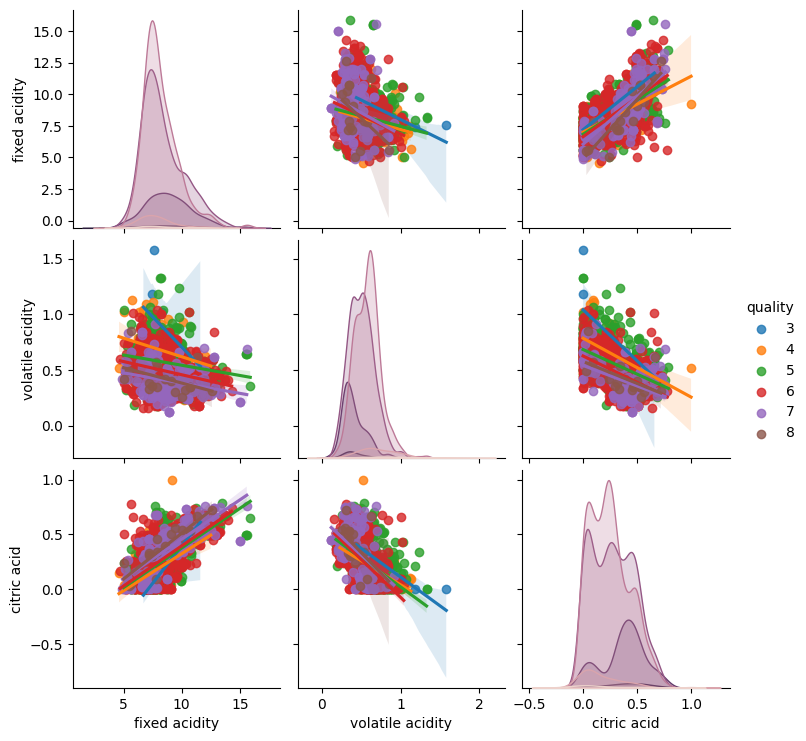

In [29]:
cols2plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'quality']

sns.pairplot(data[cols2plot], kind='reg', hue='quality')
plt.show()

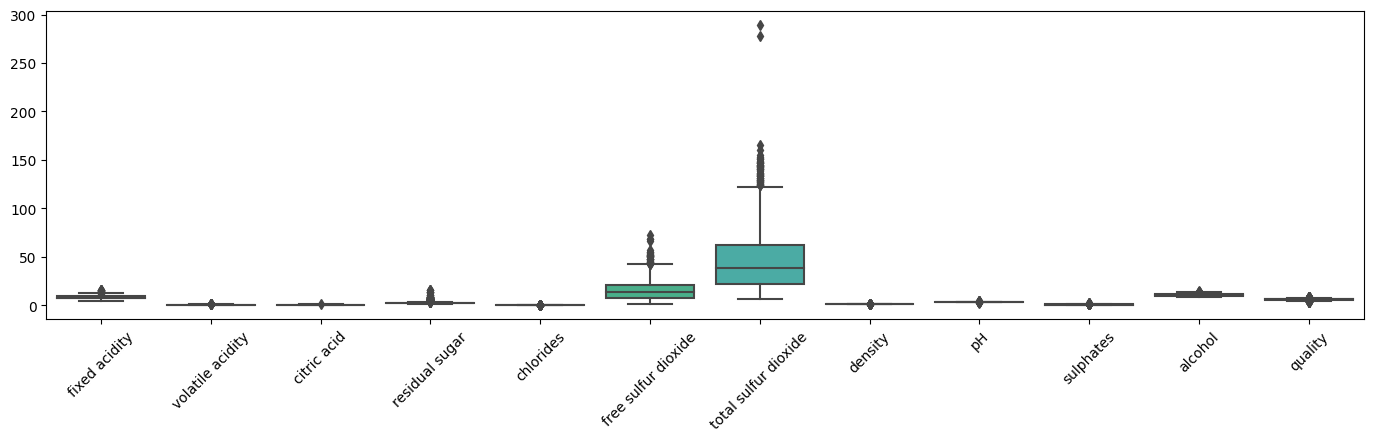

In [30]:
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

# removes rows with outliers:
data = data[data['total sulfur dioxide']<200]

In [31]:
cols_to_z_score = data.keys()
cols_to_z_score = cols_to_z_score.drop('quality')

# for col in cols_to_z_score:
#     meanval = np.mean(data[col])
#     stdev = np.std(data[col], ddof=0)
#     data[col] = (data[col]-meanval) / stdev
data[cols_to_z_score] = data[cols_to_z_score].apply(stats.zscore)    
data.describe()

/tmp/ipykernel_1723/3734460815.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols_to_z_score] = data[cols_to_z_score].apply(stats.zscore)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,3.559388e-17,1.245786e-16,1.779694e-17,-9.788316e-17,-1.423755e-16,8.898469e-18,-5.339081e-17,-8.361001e-14,3.025479e-16,8.898469e-17,-5.695020e-16,5.634314
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,0.806630
min,-2.136087e+00,-2.280762e+00,-1.391823e+00,-1.169149e+00,-1.604575e+00,-1.422837e+00,-1.262581e+00,-3.546932e+00,-3.709380e+00,-1.937318e+00,-1.899221e+00,3.000000
25%,-7.006076e-01,-7.718255e-01,-9.286769e-01,-4.525789e-01,-3.721412e-01,-8.478700e-01,-7.596977e-01,-6.111392e-01,-6.587444e-01,-6.392206e-01,-8.653154e-01,5.000000
50%,-2.412541e-01,-4.530063e-02,-5.384522e-02,-2.376079e-01,-1.809014e-01,-1.770746e-01,-2.568145e-01,-6.216372e-04,-9.673073e-03,-2.261897e-01,-2.073755e-01,6.000000
75%,5.051954e-01,6.253377e-01,7.695258e-01,4.902022e-02,5.283609e-02,4.937208e-01,4.975104e-01,5.780428e-01,5.744912e-01,4.228588e-01,6.385471e-01,6.000000
max,4.352281e+00,5.878672e+00,3.754246e+00,9.292776e+00,1.112349e+01,5.380944e+00,3.734821e+00,3.683719e+00,4.533826e+00,7.916418e+00,4.210221e+00,8.000000


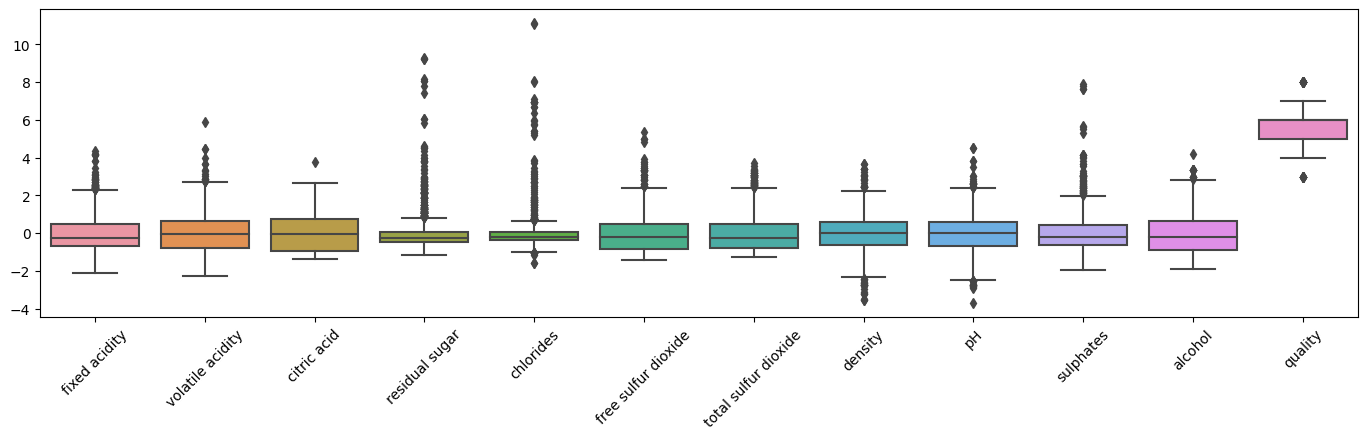

In [32]:
fig, ax = plt.subplots(1, figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

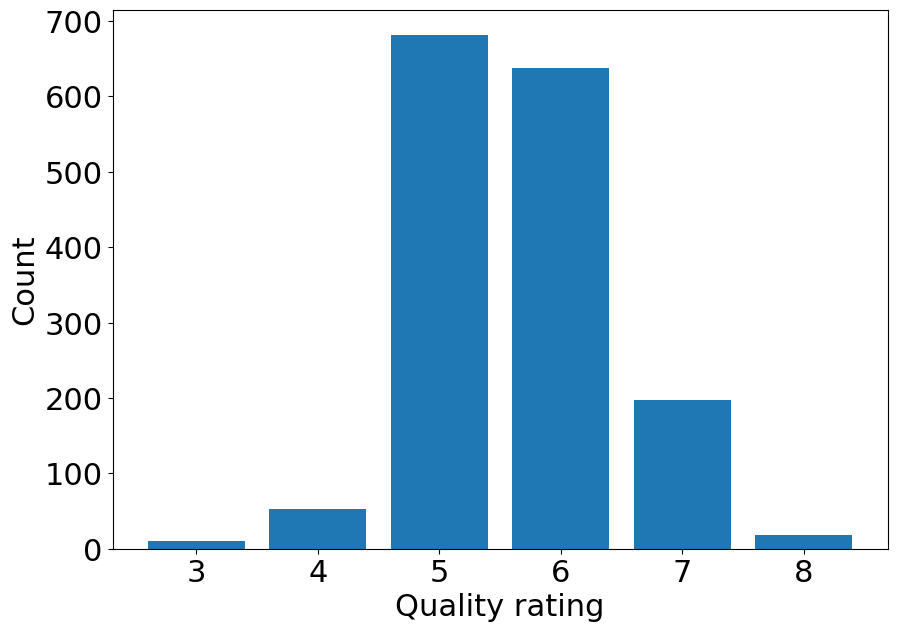

/tmp/ipykernel_1723/1807777223.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool_quality'] = 0
/tmp/ipykernel_1723/1807777223.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool_quality'][data['quality']>5] = 1
/tmp/ipykernel_1723/1807777223.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool_quality'][data['quality']>5] = 1


,quality,bool_quality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [33]:
fig = plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 22})

counts = data['quality'].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel('Quality rating')
plt.ylabel('Count')
plt.show()


data['bool_quality'] = 0
data['bool_quality'][data['quality']>5] = 1

data[['quality', 'bool_quality']]

In [34]:
dataT = torch.tensor(data[cols_to_z_score].values).float()
labels = torch.tensor(data['bool_quality'].values).float()

print(dataT.shape)
print(labels.shape)

labels = labels[:, None]
print(labels.shape)

torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [35]:
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size=.1)

train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

batch_size=64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0])

In [36]:
for X, y in train_loader:
    print(X.shape, y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


In [37]:
def create_model():
    VINEiris = nn.Sequential(
    nn.Linear(11, 16),
    nn.ReLU(),
    nn.Linear(16, 32),
    nn.ReLU(),
    nn.Linear(32, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    )
    
    loss_fun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(VINEiris.parameters(), lr=.01)
    
    return VINEiris, loss_fun, optimizer

In [38]:
num_of_epochs = 1000

def train_model(model, loss_func, optimizer):
    train_acc = []
    test_acc = [] 
    losses = []
    
    for epoch in range(num_of_epochs):
        model.train()
        batch_acc = []
        batch_loss = []
        for X, y in train_loader:
            yHat = model(X)
            loss = loss_func(yHat, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            predlabels = yHat>0
            batch_acc.append(100*torch.mean((predlabels==y).float()).item())
            batch_loss.append(loss.item())
            
        train_acc.append(np.mean(batch_acc))
        losses.append(np.mean(batch_loss))
        
        model.eval()
        X,y = next(iter(test_loader))
        predlabels = model(X)>0
        test_acc.append(100*torch.mean((predlabels==y).float()).item())
    
    return train_acc, test_acc, losses

In [39]:
model, loss_func, optimizer = create_model()

train_acc, test_acc, losses = train_model(model, loss_func, optimizer)

In [40]:
powers_of_two = [1, 3, 5, 7, 9]
train_acc_on_batches = np.zeros((num_of_epochs, len(powers_of_two)))
test_acc_on_batches = np.zeros((num_of_epochs, len(powers_of_two)))
times = []

for idx, power in enumerate(powers_of_two):
    start = time.process_time()
    train_loader = DataLoader(train_dataset, batch_size=2**power, shuffle=True, drop_last=True)
    test_loader = DataLoader(test_dataset, batch_size=test_dataset.tensors[0].shape[0])

    VINEiris, loss_fun, optimizer = create_model()

    train_acc, test_acc, losses = train_model(VINEiris, loss_fun, optimizer)
    train_acc_on_batches[:, idx] = train_acc
    test_acc_on_batches[:, idx] = test_acc
    end = time.process_time()
    times.append(end-start)

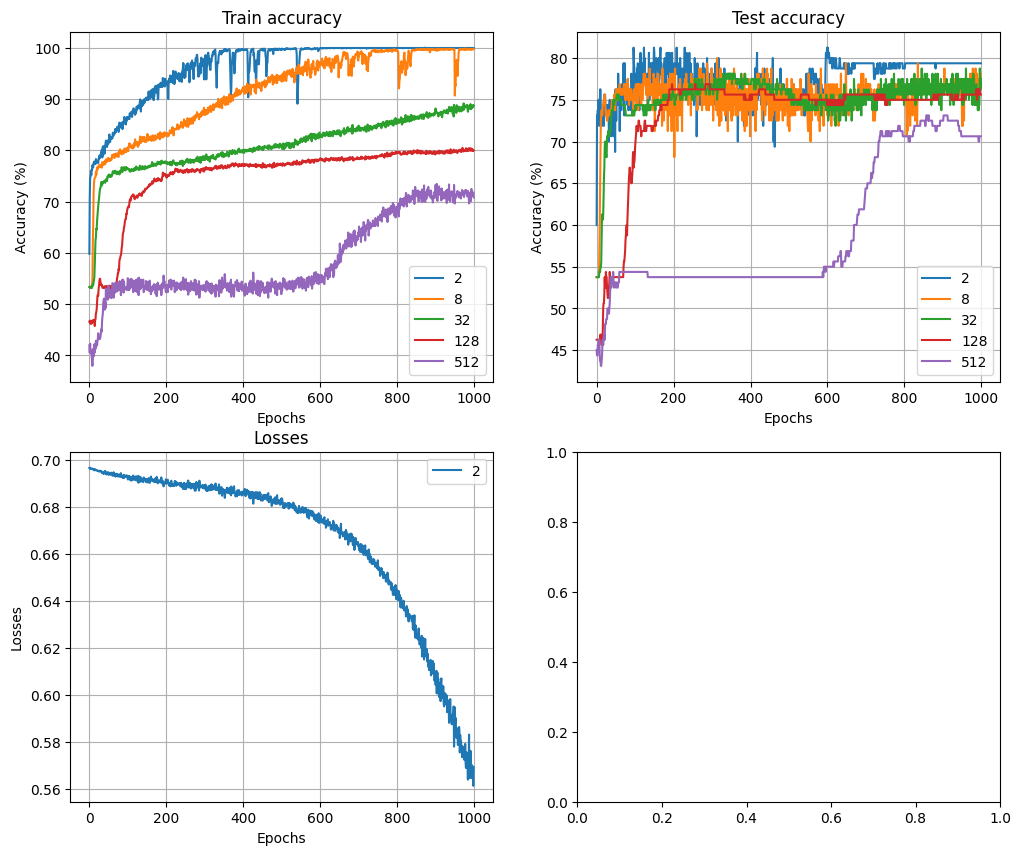

In [41]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(2,2, figsize=(12, 10))
ax[0, 0].plot(train_acc_on_batches)
ax[0, 0].set_title('Train accuracy')
ax[0, 1].plot(test_acc_on_batches)
ax[0, 1].set_title('Test accuracy')

ax[1, 0].plot(losses)
ax[1, 0].set_title('Losses')

leg_labels = [2**power_of_two for power_of_two in powers_of_two]

for i in range(2):
    ax[0, i].legend(leg_labels)
    ax[0, i].set_xlabel('Epochs')
    ax[0, i].set_ylabel('Accuracy (%)')
    ax[0, i].grid()
    
ax[1, 0].legend(leg_labels)
ax[1, 0].set_xlabel('Epochs')
ax[1, 0].set_ylabel('Losses')
ax[1, 0].grid()
    
plt.show()
fig.tight_layout()

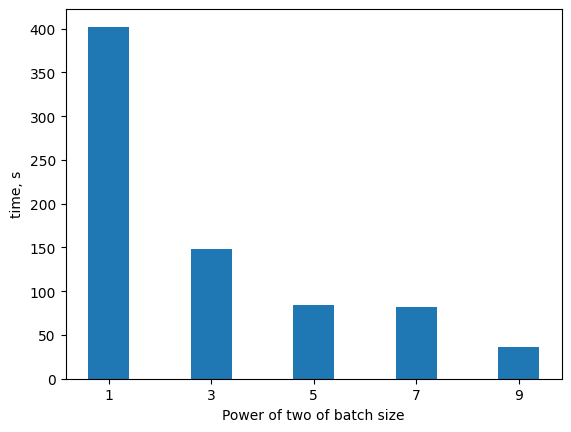

In [42]:
plt.bar(powers_of_two, times)
plt.xticks(powers_of_two)
plt.xlabel('Power of two of batch size')
plt.ylabel('time, s')
plt.show()